In [1]:
# Implement DEAP (Distributed Evolutionary Algorithms) using Python

In [3]:
pip install deap

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import random
from deap import base, creator, tools, algorithms
import matplotlib.pyplot as plt

In [7]:
# Define fitness and individual types
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))  # Minimize
creator.create("Individual", list, fitness=creator.FitnessMin)

# Initialize toolbox
toolbox = base.Toolbox()
toolbox.register("attr_float", random.uniform, -10, 10)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Objective function: f(x) = x^2
def eval_func(individual):
    x = individual[0]
    return (x**2,)

toolbox.register("evaluate", eval_func)
toolbox.register("mate", tools.cxBlend, alpha=0.5)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)
# Parameters
population = toolbox.population(n=50)
NGEN = 30
CXPB = 0.5
MUTPB = 0.2

# Store best fitness per generation
best_fit = []

for gen in range(NGEN):
    offspring = algorithms.varAnd(population, toolbox, cxpb=CXPB, mutpb=MUTPB)
    
    fits = list(map(toolbox.evaluate, offspring))
    for fit, ind in zip(fits, offspring):
        ind.fitness.values = fit

    population = toolbox.select(offspring, k=len(population))

    best_ind = tools.selBest(population, 1)[0]
    best_fit.append(best_ind.fitness.values[0])
    print(f"Gen {gen+1}: Best fitness = {best_ind.fitness.values[0]:.4f}")

print("\nBest solution found:", best_ind)

Gen 1: Best fitness = 0.0054
Gen 2: Best fitness = 0.0002
Gen 3: Best fitness = 0.0002
Gen 4: Best fitness = 0.0002
Gen 5: Best fitness = 0.0000
Gen 6: Best fitness = 0.0000
Gen 7: Best fitness = 0.0000
Gen 8: Best fitness = 0.0000
Gen 9: Best fitness = 0.0000
Gen 10: Best fitness = 0.0000
Gen 11: Best fitness = 0.0000
Gen 12: Best fitness = 0.0000
Gen 13: Best fitness = 0.0000
Gen 14: Best fitness = 0.0000
Gen 15: Best fitness = 0.0000
Gen 16: Best fitness = 0.0000
Gen 17: Best fitness = 0.0000
Gen 18: Best fitness = 0.0000
Gen 19: Best fitness = 0.0000
Gen 20: Best fitness = 0.0000
Gen 21: Best fitness = 0.0000
Gen 22: Best fitness = 0.0000
Gen 23: Best fitness = 0.0000
Gen 24: Best fitness = 0.0000
Gen 25: Best fitness = 0.0000
Gen 26: Best fitness = 0.0000
Gen 27: Best fitness = 0.0000
Gen 28: Best fitness = 0.0000
Gen 29: Best fitness = 0.0000
Gen 30: Best fitness = 0.0000

Best solution found: [1.8453993403921854e-10]


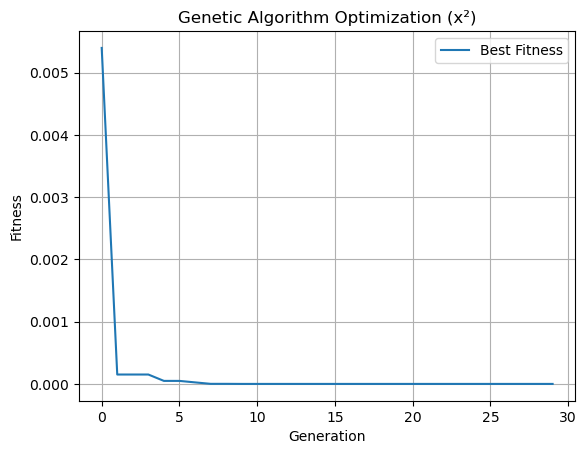

In [9]:
plt.plot(best_fit, label='Best Fitness')
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.title('Genetic Algorithm Optimization (x²)')
plt.grid()
plt.legend()
plt.show()